In [ ]:
# 💡 NOTE: Runs this jupyter notebook from the projects root, mimicking a root run.
import os
# ⭐️ NOTE: Set num_to_move to how many directories it takes from this file to reach project root.
num_to_move = 1
os.chdir(os.getcwd().rsplit("/", num_to_move)[0])
print("RUNNING FROM: ->>",os.getcwd())

import torch
# # Show all values when printing torch tensors.
torch.set_printoptions(threshold=torch.inf) # shows all the values when printing tensors


# Reloads external functions when its code changes into this notebook.
%load_ext autoreload
%autoreload 1
# %aimport will only reload those files
# %aimport utils.bboxes

RUNNING FROM: ->> /Users/tonyavis/Main/AI_public_projects/object_detection/yolo_v1_orig


In [2]:
from PIL import Image
import torchvision.transforms as transforms

## Test Dataset Data

In [3]:
from data.voc_dataset import VOCDataset
from configs.config_loader import load_config
from data.utils.setup_transforms import setup_transforms
from data.utils.bbox_utils import extract_and_convert_bboxes

%aimport data.utils.bbox_utils

In [4]:
cfg = load_config("yolov1.yaml")

In [5]:
t = setup_transforms(cfg.IMAGE_SIZE)
d = VOCDataset(cfg, t)

In [6]:
img_tensor, boxes_t = d.__getitem__(1)

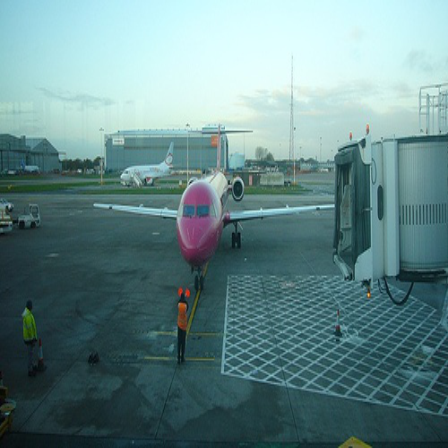

In [7]:
to_pil = transforms.ToPILImage() # convert tensor to PIL Image
pil_image = to_pil(img_tensor)
pil_image

## Extract And Convert Bounding Boxes To Corner-Points With Absolute Values 

In [8]:
from data.utils.bbox_utils import extract_and_convert_bboxes
boxes_corner_abs = extract_and_convert_bboxes(boxes_t, cfg)
boxes_corner_abs

tensor([[  7.0000,   1.0000, 119.1680, 140.2989, 176.5120, 196.0996],
        [  7.0000,   1.0000,  93.1840, 124.3559, 336.0000, 291.7580],
        [  0.0000,   1.0000,  23.2960, 301.3239,  39.4240, 379.4449],
        [  0.0000,   1.0000, 174.7200, 286.9751, 190.8480, 365.0961]])

## Plot

In [9]:
from PIL import Image, ImageDraw

In [10]:
# Define a list of 20 colors one for each class.
colors = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255),
    (255, 0, 255), (128, 0, 128), (192, 192, 192), (128, 128, 128), (128, 0, 0), (128, 128, 0),
    (0, 128, 0), (0, 128, 128), (0, 0, 128), (255, 165, 0),
    (255, 215, 0), (173, 255, 47), (255, 20, 147), (0, 250, 154), (70, 130, 180)
]

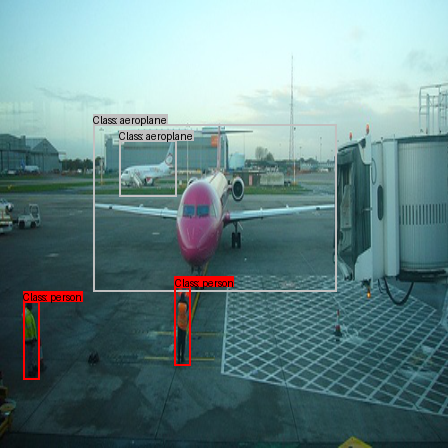

In [11]:
draw = ImageDraw.Draw(pil_image)

for box in boxes_corner_abs:
    cls_idx, score, x1, y1, x2, y2 = box
    cls_idx = int(cls_idx)

    # Choose color based on class_id
    color = colors[cls_idx % len(colors)]

    # --- Draw the bounding box
    draw.rectangle([x1, y1, x2, y2], outline=color, width=2)

    # --- Draw the label with class ID
    label = f'Class: {cfg.CLASS_NAMES[cls_idx]}'
    text_size = draw.textbbox((0, 0), label)
    text_width = text_size[2] - text_size[0]
    text_height = text_size[3] - text_size[1]

    # --- Position the label
    if y1 - text_height >= 0:
        text_origin = (x1, y1 - text_height)
    else:
        text_origin = (x1, y1 + 1)

    # --- Draw a filled rectangle for the text background
    draw.rectangle([text_origin[0], text_origin[1], text_origin[0] + text_width, text_origin[1] + text_height], fill=color)
    # --- Draw the text
    draw.text(text_origin, label, fill=(0, 0, 0))

pil_image
